## Loading Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation
from keras_preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import cv2
import cvlib as cv
from mtcnn import MTCNN
import glob
import pickle
import warnings

## Loading the dataset

In [104]:
# file = path of the directory. All the image should be in a format of image+no+.jpg. for example image1.jpg
# n = Total number of Image
def raw_image_loading(file,n):  
    raw_image = []
    i = 0
    size = (160,160)
    print("Raw Image is loading in the list called raw_image")
    print("|", end=" ")
    while(i != n+1):
        path = "image"+str(i)+".png"
        file_path = file+"/"+ path
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, size)
        raw_image.append(img)
        if(i%10 == 0):
            print("=",end = "")
        i+=1
    print(" |")
    print("Image Loaded")
    return raw_image

In [3]:
raw_image = raw_image_loading("Desktop/kashmir_raw_dataset", 310)

Raw Image is loading in the list called raw_image
| ================================ |
Image Loaded


## Raw Image Visualization

In [14]:
def raw_image_visualizer(raw_image):
    size = (160,160)
    plt.rcParams["font.size"] = 10
    fig = plt.figure(figsize=(2,2), dpi= 300)
    plt.gca().set_title("Raw Image Visualization", fontweight="bold", fontname="Times New Roman")
    plt.axis("off")
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
        value = np.random.randint(310)
        img = raw_image[value]
        img = cv2.resize(img, size)
        ax.imshow(img)

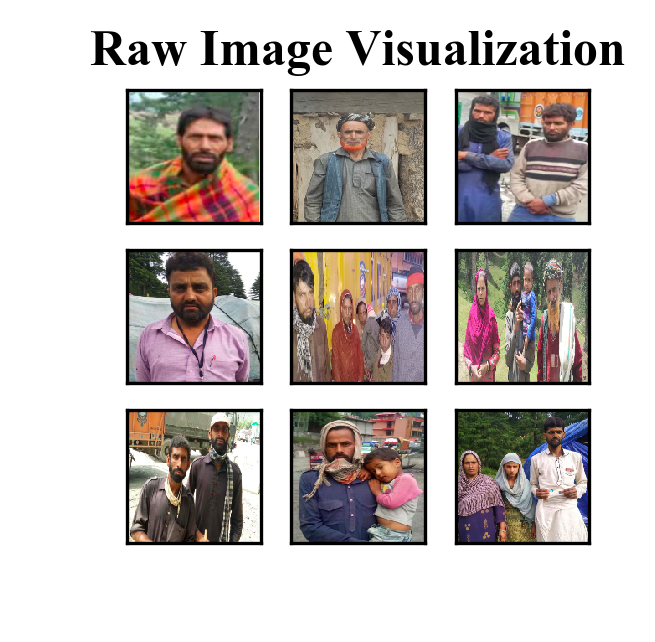

In [15]:
raw_image_visualizer(raw_image)

## Processing Raw Image 

In [43]:
def face_detector():
    print("Face detector is loading")
    detector = MTCNN()
    print("Face detector is loaded")
    return detector
detector = face_detector()

Face detector is loading
Face detector is loaded


/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/mtcnn/data/mtcnn_weights.npy'>
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
def raw_image_processor(detector,raw_image): 
    processed_image = []
    n = 311
    i=0
    j=0
    size = (160,160)
    print("Image is Processing")
    print("| ", end = "")
    while(i != n):
        img = raw_image[i]
        result = detector.detect_faces(img)
        for k in range(len(result)):
            x1, y1, width, height = result[k]['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1+width, y1+height
            face = img[y1:y2, x1:x2]
            face = cv2.resize(face,size)
            processed_image.append(face)
            if(i%20 == 0):
                print("=",end="")
            #cv2.imwrite("Desktop/Kashmir Production/Processed kashmir images/image"+str(j)+".png",cv2.cvtColor(face,cv2.COLOR_BGR2RGB))
            j+=1
        i+=1
    print(" |")
    print("Image is processed")
    return processed_image

In [82]:
processed_image = raw_image_processor(detector, raw_image)

Image is Processing
| ======================================== |
Image is processed


## Processed Image Visualization

In [83]:
def processed_image_visualizer(processed_image):
    size = (160,160)
    plt.rcParams["font.size"] = 10
    fig = plt.figure(figsize=(2,2), dpi= 300)
    plt.gca().set_title("Processed Image Visualization", fontweight="bold", fontname="Times New Roman")
    plt.axis("off")
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
        value = np.random.randint(831)
        img = processed_image[value]
        img = cv2.resize(img, size)
        ax.imshow(img)

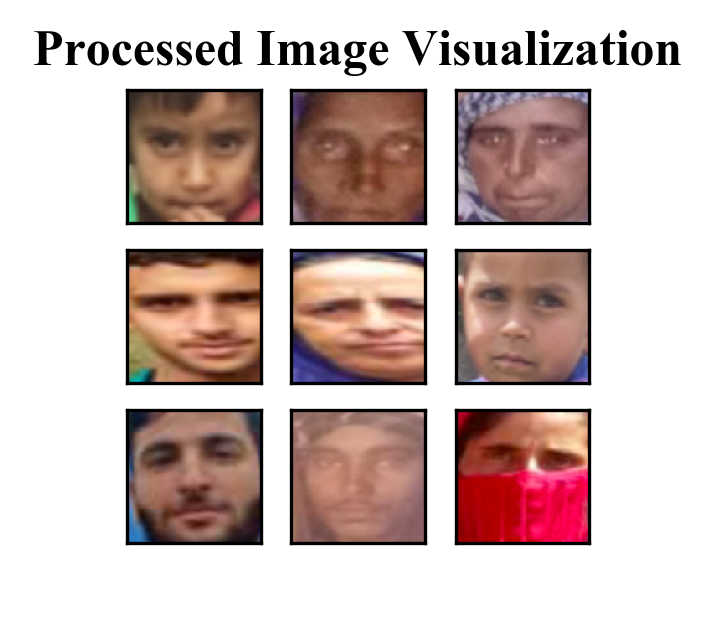

In [84]:
processed_image_visualizer(processed_image)

## Converting processed Image into linear array

In [85]:
# I selected some unique image and gave a unique label. Because i didnt have the labels of image

In [105]:
X = raw_image_loading("Desktop/AI_KASHIR", 100)

Raw Image is loading in the list called raw_image
| =========== |
Image Loaded


In [106]:
y = list(range(0,101))

In [107]:
np.shape(X[0])

(160, 160, 3)

In [108]:
X = np.array(X)
y = np.array(y)

## Applying Image Augmentation

In [115]:
def image_augmentation(X,y,file):
    datagen = ImageDataGenerator(rotation_range=60, horizontal_flip=True)
    print("Augmented Image is loading")
    print("| ",end="")
    for j in range(len(X)):
        img = np.reshape(X[j], (1,160,160,3))
        label = "image"+str(j)
        address = file+"/Train/"
        i=0
        for batch in datagen.flow(img,batch_size=1, save_to_dir=address, save_prefix=label , save_format="jpg"):
            if(i < 7):
                address = file+"/Test/"
                i+=1
            else:
                break
        address = file+"/Test/"
        for batch in datagen.flow(img,batch_size=1, save_to_dir=address, save_prefix=label , save_format="jpg"):
            if(i < 3):
                address = file+"/Test/"
                i+=1
            else:
                break
        if(j%10 == 0):
            print("=",end="")
    print(" |")
    print("Augmented Image Loaded")

In [116]:
image_augmentation(X,y,"Desktop/Kashmir Production/Augmented Image")

Augmented Image is loading
| =========== |
Augmented Image Loaded


In [117]:
## Final Augmented Image is loaded in the given directory

## Converting an image into Linear Array

In [2]:
def converted_image_loading(file, n):
    size=(160,160)
    X=[]
    y=[]
    i=0
    print("| ",end="")
    for im in glob.glob(file+"/*.*"):
        img = cv2.imread(im)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, size)
        X.append(img)
        data=im.split("/")[4]
        label = data.split("_")[0]
        y.append(label)
        if(i%10 == 0):
            print("=",end="")
        i+=1
    print(" |")
    return X,y

In [3]:
print("Training image is loading")
X_train, y_train = converted_image_loading("Desktop/Kashmir Production/Augmented Image/Train",807)
print("Image Loaded")

Training image is loading
| ================================================================================= |
Image Loaded


In [4]:
print("Test image is loading")
X_test, y_test = converted_image_loading("Desktop/Kashmir Production/Augmented Image/Test",101)
print("Image Loaded")

Test image is loading
| =========== |
Image Loaded


## Visualizing Augmented Image

In [7]:
def augmented_image_visualizer(X_train):
    size = (160,160)
    plt.rcParams["font.size"] = 10
    fig = plt.figure(figsize=(2,2), dpi= 300)
    plt.gca().set_title("Augmented Image Visualization", fontweight="bold", fontname="Times New Roman")
    plt.axis("off")
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
        value = np.random.randint(807)
        img = X_train[value]
        img = cv2.resize(img, size)
        ax.imshow(img)

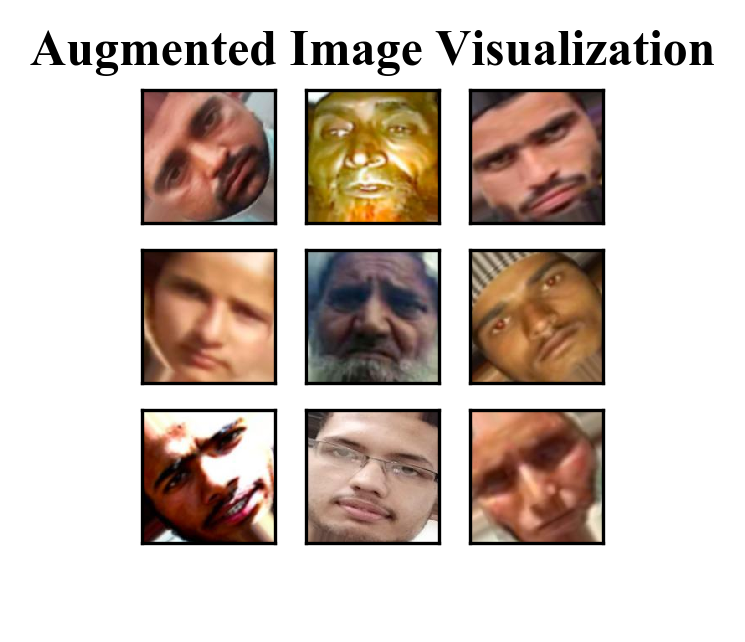

In [8]:
augmented_image_visualizer(X_train)

In [5]:
def facenet_model():
    print("Loading Image to array converter")
    facenet_model = load_model("Desktop/facenet_keras.h5/model/facenet_keras.h5")
    print("Image to array converter Loaded")
    return facenet_model

In [6]:
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

In [7]:
def image_to_array_converter(X_train,X_test):
    model = facenet_model()
    new_X_train = []
    new_X_test = []
    print("Image is Converting into array")
    print("Training Images : ", end = " |")
    for i in range(len(X_train)):
        new_X_train.append(get_embedding(model, X_train[i]))
        if(i%100 == 0):
            print("=", end = "")
    print("|")
    print("Training Image is Converted into array")
    print("Testing Image : ",end = " |")
    for i in range(len(X_test)):
        new_X_test.append(get_embedding(model, X_test[i]))
        if(i%10 == 0):
            print("=", end = "")
    print("|")
    print("Testing Image is converted into array")
    return new_X_train, new_X_test

In [8]:
X_train,X_test = image_to_array_converter(X_train,X_test)

Loading Image to array converter
Image to array converter Loaded
Image is Converting into array
Training Images :  |=========|
Training Image is Converted into array
Testing Image :  |===========|
Testing Image is converted into array


## Processing Labels

In [9]:
def label_converter(y_train, y_test, n_class):
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)
    y_train = np_utils.to_categorical(y_train,n_class)
    y_test = np_utils.to_categorical(y_test,n_class)
    return y_train, y_test

In [10]:
y_train, y_test = label_converter(y_train,y_test,101)

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
def neural_network():
    nn_model = Sequential()
    nn_model = Sequential()
    nn_model.add(Dense(256, input_dim = 128 , activation = "relu"))
    nn_model.add(Dense(128, activation = "relu"))
    nn_model.add(Dense(101, activation = "softmax"))
    nn_model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])
    print(nn_model.summary())
    return nn_model

In [52]:
nn_model = neural_network()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 101)               13029     
Total params: 78,949
Trainable params: 78,949
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
nn_model.fit(X_train, y_train,validation_data=(X_test, y_test) ,epochs=10)

Epoch 1/10
26/26 [==============================] - 0s 11ms/step - loss: 4.4017 - accuracy: 0.0954 - val_loss: 3.9269 - val_accuracy: 0.3168
Epoch 2/10
26/26 [==============================] - 0s 5ms/step - loss: 3.2744 - accuracy: 0.4449 - val_loss: 2.9121 - val_accuracy: 0.4554
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 2.0572 - accuracy: 0.6605 - val_loss: 2.0253 - val_accuracy: 0.6040
Epoch 4/10
26/26 [==============================] - 0s 9ms/step - loss: 1.3138 - accuracy: 0.7745 - val_loss: 1.5997 - val_accuracy: 0.6832
Epoch 5/10
26/26 [==============================] - 0s 6ms/step - loss: 0.8943 - accuracy: 0.8389 - val_loss: 1.3456 - val_accuracy: 0.7228
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 0.6489 - accuracy: 0.8848 - val_loss: 1.1603 - val_accuracy: 0.7327
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.9269 - val_loss: 1.0554 - val_accuracy: 0.7723
Epoch 8/10
26/26 [=

In [54]:
nn_model.save("Desktop/Kashmir Production/new_kashmir3.model")

INFO:tensorflow:Assets written to: Desktop/Kashmir Production/new_kashmir3.model/assets


In [55]:
def computer_vison(nn_model):
    model = facenet_model()
    webcam = cv2.VideoCapture(0)
    while webcam.isOpened():
        status , frame = webcam.read()
        frame = cv2.flip(frame,1)
        face, confidence = cv.detect_face(frame)
        for idx, f in enumerate(face):       
            (startX, startY) = f[0], f[1]
            (endX, endY) = f[2], f[3]
            cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
            face_pixel = frame[startY:endY, startX:endX]
            face_pixel = cv2.resize(face_pixel, (160,160))
            face_pixel = get_embedding(model,face_pixel)
            face_pixel = np.array(face_pixel)
            face_pixel = face_pixel.reshape(1,128)
            y_pred = nn_model.predict(face_pixel)
            y_pred = y_pred[0]
            if(np.argmax(y_pred) == 3):
                name = "Santosh"
            else:
                name = np.argmax(y_pred)
            if(round( max(y_pred)*100,2) > 95):
                label = "{0} {1}".format(name,round(max(y_pred)*100,2))
                Y = startY - 10 if startY - 10 > 10 else startY + 10
                cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)
        cv2.imshow("Kashmir Face Recognition", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

In [56]:
computer_vison(nn_model)

Loading Image to array converter
Image to array converter Loaded
